In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_lg')

In [3]:
with open(r'data\fitzgerald\fitzgerald_gatsby.txt', 'r') as f:
    fg_text = f.read()

gatsby_nlp = nlp(fg_text)

with open(r'data\hemingway\hemingway_sun_also.txt', 'r') as f:
    sun_text = f.read()

sun_nlp = nlp(sun_text)

In [4]:
print(len(list(gatsby_nlp.sents)))
print(len(list(sun_nlp.sents)))

2894
6568


In [5]:
tagDict = {w.pos: w.pos_ for w in gatsby_nlp}

In [6]:
extendedTagDict = {w.pos: w.pos_ + "_" + w.tag_ for w in gatsby_nlp}

In [7]:
gatsby_POS = pd.Series(gatsby_nlp.count_by(spacy.attrs.POS))/len(gatsby_nlp)
sun_POS = pd.Series(sun_nlp.count_by(spacy.attrs.POS))/len(sun_nlp)

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

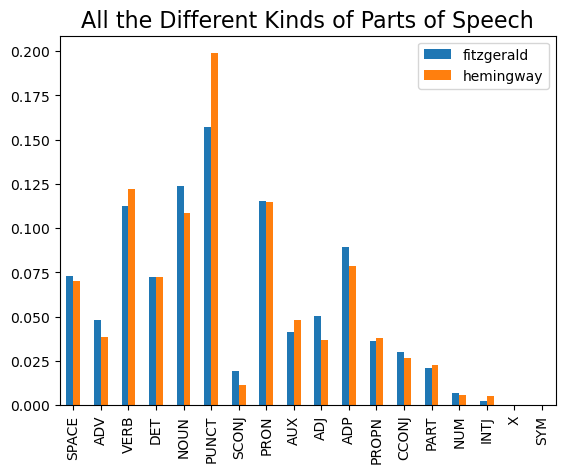

In [6]:
df = pd.DataFrame([gatsby_POS, sun_POS], index=['fitzgerald', 'hemingway'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')
plt.title('All the Different Kinds of Parts of Speech', fontsize=16)

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

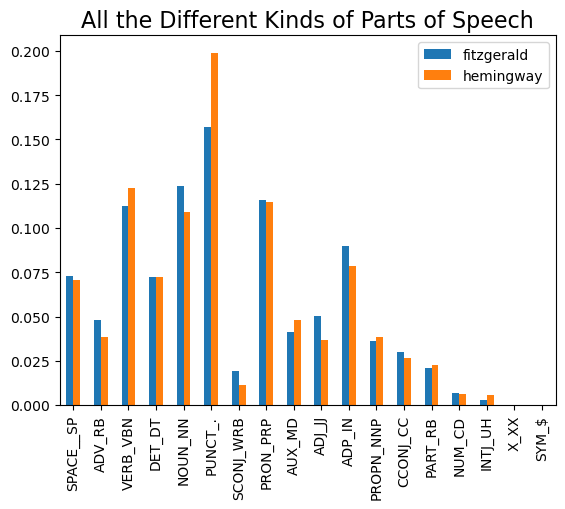

In [8]:
df = pd.DataFrame([gatsby_POS, sun_POS], index=['fitzgerald', 'hemingway'])
df.columns = [extendedTagDict[column] for column in df.columns]
df.T.plot(kind='bar')
plt.title('All the Different Kinds of Parts of Speech', fontsize=16)

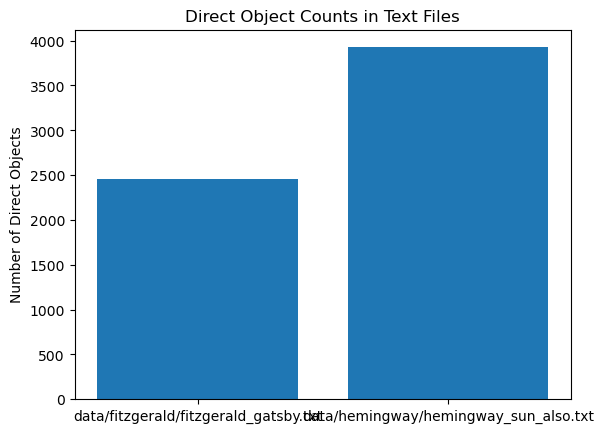

In [7]:
file_names = [
    'data/fitzgerald/fitzgerald_gatsby.txt',
    'data/hemingway/hemingway_sun_also.txt'
]

# List to store the number of direct objects for each text file
direct_object_counts = []

# Loop over the file names
for file_name in file_names:
    # Open the text file and read its content
    with open(file_name, "r") as file:
        text = file.read()

    # Process the text using spaCy
    doc = nlp(text)

    # Initialize a counter for direct objects
    direct_object_count = 0

    # Iterate over the parsed sentences in the text
    for sent in doc.sents:
        # Iterate over the tokens in the sentence
        for token in sent:
            # Check if the token is a direct object
            if token.dep_ == "dobj":
                # Increment the counter
                direct_object_count += 1

    # Append the number of direct objects found to the list
    direct_object_counts.append(direct_object_count)

# Plot the results using a bar plot
x = range(len(file_names))
plt.bar(x, direct_object_counts)
plt.xticks(x, file_names)
plt.ylabel("Number of Direct Objects")
plt.title("Direct Object Counts in Text Files")
plt.show()


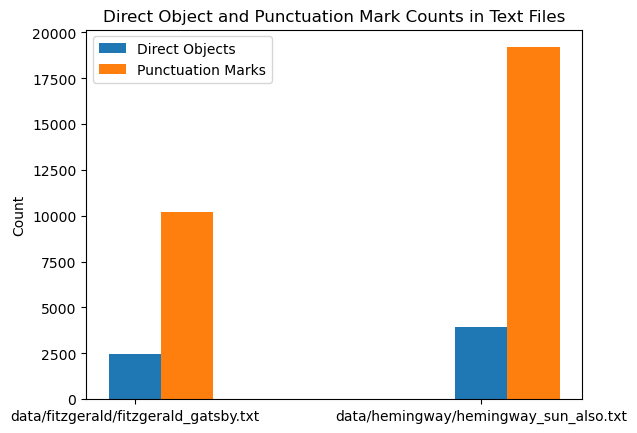

In [8]:
direct_object_counts = []
punct_counts = []

for file_name in file_names:
    # Open the text file and read its content
    with open(file_name, "r") as file:
        text = file.read()

    # Process the text using spaCy
    doc = nlp(text)

    # Initialize a counter for direct objects
    direct_object_count = 0
    punct_count = 0

    # Iterate over the parsed sentences in the text
    for sent in doc.sents:
        # Iterate over the tokens in the sentence
        for token in sent:
            # Check if the token is a direct object
            if token.dep_ == "dobj":
                # Increment the counter
                direct_object_count += 1
            elif token.pos_ == "PUNCT":
                punct_count += 1

    # Append the number of direct objects found to the list
    direct_object_counts.append(direct_object_count)
    punct_counts.append(punct_count)

x = range(len(file_names))
bar_width = 0.15
plt.bar(x, direct_object_counts, bar_width, label="Direct Objects")
plt.bar([i + bar_width for i in x], punct_counts, bar_width, label="Punctuation Marks")
plt.xticks(x, file_names)
plt.ylabel("Count")
plt.title("Direct Object and Punctuation Mark Counts in Text Files")
plt.legend()
plt.show()

In [10]:
import csv
import os

root_folder = 'data'
filenames = []
direct_object_counts = []
punct_counts = []

for subfolder in os.listdir(root_folder):
    subfolder_path = os.path.join(root_folder, subfolder)
    
    for file in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file)
        print("Processing file:", file)
        with open(file_path, 'r', encoding="utf-8") as f:
            text = f.read()
        filename_cut = file_path.split("\\")[2].split(".")[0]
        filenames.append(filename_cut)
        
        # Process the text using spaCy
        print("Converting to spaCy doc format:", file)
        doc = nlp(text)

        # Initialize a counter for direct objects
        direct_object_count = 0
        punct_count = 0

        # Iterate over the parsed sentences in the text
        for sent in doc.sents:
            # Iterate over the tokens in the sentence
            for token in sent:
                # Check if the token is a direct object
                if token.dep_ == "dobj":
                    # Increment the counter
                    direct_object_count += 1
                elif token.pos_ == "PUNCT":
                    punct_count += 1

    # Append the number of direct objects found to the list
        direct_object_counts.append(direct_object_count)
        punct_counts.append(punct_count)

Processing file: fitzgerald_all_the_sad.txt
Converting to spaCy doc format: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Converting to spaCy doc format: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Converting to spaCy doc format: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Converting to spaCy doc format: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_gatsby.txt
Converting to spaCy doc format: fitzgerald_gatsby.txt
Processing file: fitzgerald_tales_jazz_age.txt
Converting to spaCy doc format: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_tender_is.txt
Converting to spaCy doc format: fitzgerald_tender_is.txt
Processing file: fitzgerald_the_vegtable.txt
Converting to spaCy doc format: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_this_side.txt
Converting to spaCy doc format: fitzgerald_this_side.txt
Processing file: hemingwa

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_5124\3170810614.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(filenames, rotation=90)
C:\Users\KSpicer\AppData\Local\Temp\ipykernel_5124\3170810614.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(filenames, rotation=90)


Text(0.5, 1.0, 'Punctuation Counts by Author')

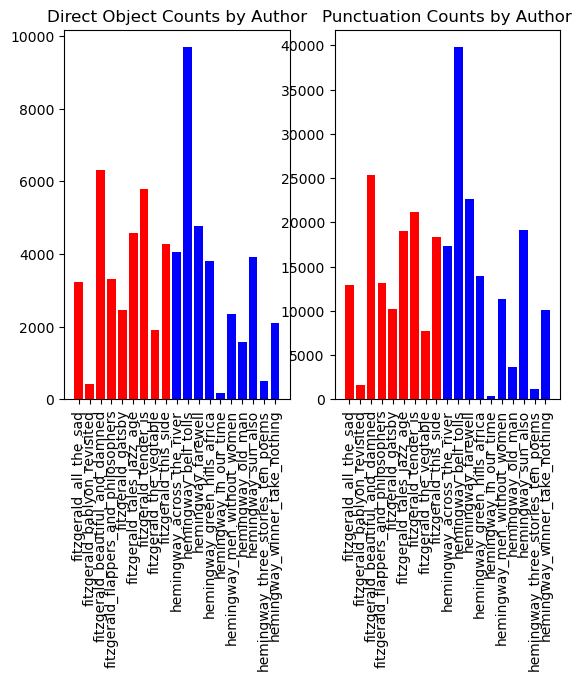

In [11]:
# Categorize each text based on author
author_category = []
for filename in filenames:
    if "fitzgerald" in filename.lower():
        author_category.append("Fitzgerald")
    elif "hemingway" in filename.lower():
        author_category.append("Hemingway")
    else:
        author_category.append("Other")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Plot the direct object counts for each text
for i, filename in enumerate(filenames):
    if author_category[i] == "Fitzgerald":
        color = "red"
    elif author_category[i] == "Hemingway":
        color = "blue"
    else:
        color = "gray"
    ax1.bar(filename, direct_object_counts[i], color=color)
ax1.set_xticklabels(filenames, rotation=90)
ax1.set_title("Direct Object Counts by Author")

# Plot the punctuation counts for each text
for i, filename in enumerate(filenames):
    if author_category[i] == "Fitzgerald":
        color = "red"
    elif author_category[i] == "Hemingway":
        color = "blue"
    else:
        color = "gray"
    ax2.bar(filename, punct_counts[i], color=color)
ax2.set_xticklabels(filenames, rotation=90)
ax2.set_title("Punctuation Counts by Author")

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_5124\4238457644.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filenames, rotation=90)
C:\Users\KSpicer\AppData\Local\Temp\ipykernel_5124\4238457644.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filenames, rotation=90)


Text(0.5, 1.0, 'Punctuation Counts by Author')

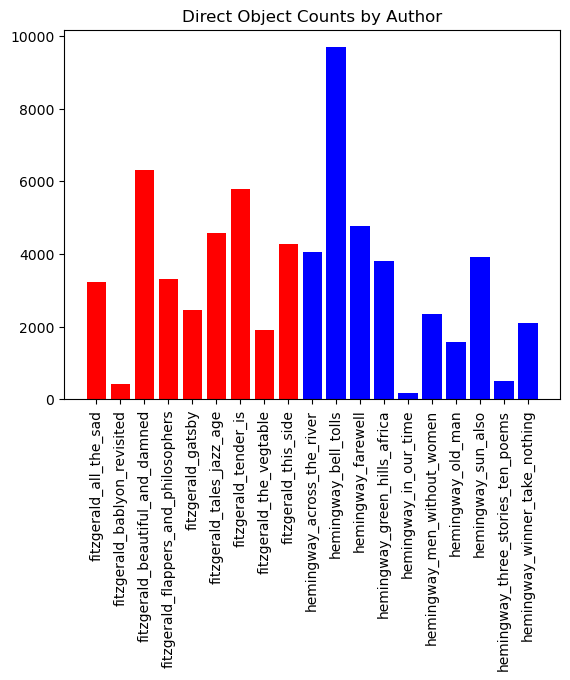

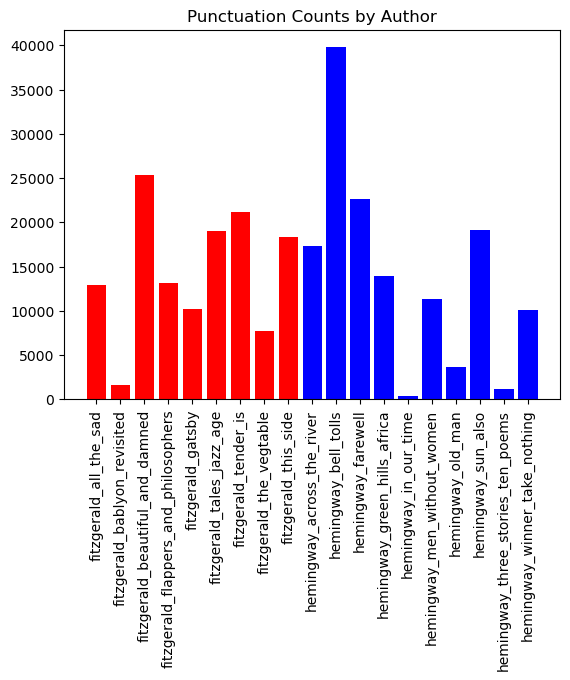

In [12]:
import matplotlib.pyplot as plt

# Categorize each text based on author
author_category = []
for filename in filenames:
    if "fitzgerald" in filename.lower():
        author_category.append("Fitzgerald")
    elif "hemingway" in filename.lower():
        author_category.append("Hemingway")
    else:
        author_category.append("Other")

# Plot the direct object counts for each text
fig, ax = plt.subplots()
for i, filename in enumerate(filenames):
    if author_category[i] == "Fitzgerald":
        color = "red"
    elif author_category[i] == "Hemingway":
        color = "blue"
    else:
        color = "gray"
    ax.bar(filename, direct_object_counts[i], color=color)
ax.set_xticklabels(filenames, rotation=90)
ax.set_title("Direct Object Counts by Author")

# Plot the punctuation counts for each text
fig, ax = plt.subplots()
for i, filename in enumerate(filenames):
    if author_category[i] == "Fitzgerald":
        color = "red"
    elif author_category[i] == "Hemingway":
        color = "blue"
    else:
        color = "gray"
    ax.bar(filename, punct_counts[i], color=color)
ax.set_xticklabels(filenames, rotation=90)
ax.set_title("Punctuation Counts by Author")


In [13]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_capital_words(text):
    return sum(map(str.isupper,text.split()))

def count_sent(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

def preprocess(sent):
    sent = sent.lower() # lower case
    sent = re.sub('\s+', ' ', sent) #remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

In [14]:
import os
from helper_functions import load_data
import pandas as pd

text_data, labels = load_data('data')

df = pd.DataFrame(list(zip(text_data, labels)))

c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_this_side.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_men_without_women.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_three_stories_ten_poems.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_b

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['text_data'] = df['text_data'].apply(lambda x: preprocess(x))
df['text_data'] = df['text_data'].apply(lambda x: preprocess(x))

# No feature engineering whatsoever ...:

In [21]:
train, test = train_test_split(df, test_size=0.2)
train.head()

,text_data,label
8,book one—the romantic egotist chapter . amory...,0
13,in our time chapter everybody was drunk. the ...,1
16,”you are all a lost generation.” —gertrude st...,1
9,chapter i they started two hours before daylig...,1
0,"the rich boy begin with an individual, and bef...",0


In [23]:
vectorizer = TfidfVectorizer()
train_final_features = vectorizer.fit_transform(train['text_data']).toarray()
test_final_features = vectorizer.transform(test['text_data']).toarray()
print(train_final_features.shape)
print(test_final_features.shape)

(15, 28071)
(4, 28071)


In [24]:
train_tf_idf = pd.DataFrame(train_final_features)
test_tf_idf = pd.DataFrame(test_final_features)

In [27]:
train_label = train['label']
test_label = test['label']

In [29]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(train_tf_idf, train_label, test_size = 0.2)
ytest = np.array(test_label)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_tf_idf, train_label ,test_size=0.2)
_RandomForestClassifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42)
_RandomForestClassifier.fit(X_train, y_train)
_RandomForestClassifier_prediction = _RandomForestClassifier.predict(X_test)
val_RandomForestClassifier_prediction = _RandomForestClassifier.predict(test_tf_idf)
print("Accuracy => ", round(accuracy_score(_RandomForestClassifier_prediction, y_test)*100, 2))
print("\nRandom Forest Classifier results: \n")
print(classification_report(y_test, _RandomForestClassifier_prediction, target_names = ['fitzgerald', 'hemingway']))
print("Validation Accuracy => ", round(accuracy_score(val_RandomForestClassifier_prediction, ytest)*100, 2))
print("\nValidation Random Forest Classifier results: \n")
print(classification_report(ytest, val_RandomForestClassifier_prediction, target_names = ['fitzgerald', 'hemingway']))

Accuracy =>  66.67

Random Forest Classifier results: 

              precision    recall  f1-score   support

  fitzgerald       0.00      0.00      0.00         1
   hemingway       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Validation Accuracy =>  25.0

Validation Random Forest Classifier results: 

              precision    recall  f1-score   support

  fitzgerald       0.00      0.00      0.00         3
   hemingway       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

# With Feature Engineering:

In [31]:
import os
from helper_functions import load_data
import pandas as pd

text_data, labels = load_data('data')

df = pd.DataFrame(list(zip(text_data, labels)))

Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_this_side.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_men_without_women.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_three_stories_ten_poems.txt
Processing file: hemingway_winner_take_nothing.txt


In [32]:
train, test = train_test_split(df, test_size=0.2)

In [52]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,28932,28933,28934,28935,chars,words,capital_words,sentence_count,unique_words,stopwords_count
0,0.0,0.000000,0.0,0.0,0.000319,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,357962.0,63453.0,774.0,4532.0,11692.0,29412.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41172.0,7386.0,142.0,632.0,2423.0,3319.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,720556.0,123561.0,1983.0,8153.0,21815.0,55357.0
3,0.0,0.000288,0.0,0.0,0.000487,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,347280.0,60502.0,935.0,4524.0,12731.0,26729.0
5,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,496806.0,86610.0,1523.0,4847.0,17136.0,39563.0


In [34]:
train = train.rename(columns={0: "text_data", 1: "label"})
test = test.rename(columns={0: "text_data", 1: "label"})

In [51]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,28932,28933,28934,28935,chars,words,capital_words,sentence_count,unique_words,stopwords_count
0,0.0,0.000000,0.0,0.0,0.000319,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,357962.0,63453.0,774.0,4532.0,11692.0,29412.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41172.0,7386.0,142.0,632.0,2423.0,3319.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,720556.0,123561.0,1983.0,8153.0,21815.0,55357.0
3,0.0,0.000288,0.0,0.0,0.000487,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,347280.0,60502.0,935.0,4524.0,12731.0,26729.0
5,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,496806.0,86610.0,1523.0,4847.0,17136.0,39563.0


In [36]:
for idx, row in train.iterrows():
    train.loc[idx, 'chars'] = count_chars(row['text_data'])
    train.loc[idx, 'words'] = count_words(row['text_data'])
    train.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    train.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    train.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    train.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])

for idx, row in test.iterrows():
    test.loc[idx, 'chars'] = count_chars(row['text_data'])
    test.loc[idx, 'words'] = count_words(row['text_data'])
    test.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    test.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    test.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    test.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])

KeyError: 'label'

In [39]:
vectorizer = TfidfVectorizer()
train_tf_idf_features = vectorizer.fit_transform(train['text_data']).toarray()
test_tf_idf_features = vectorizer.transform(test['text_data']).toarray()
print(train_tf_idf_features.shape)
print(test_tf_idf_features.shape)

(15, 28936)
(4, 28936)


In [40]:
train_tf_idf = pd.DataFrame(train_tf_idf_features)
test_tf_idf = pd.DataFrame(test_tf_idf_features)
features = ['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count']
train_Y = train['label']
test_Y = test['label']

In [45]:
train = pd.merge(train_tf_idf, train[features], left_index=True, right_index=True)
test = pd.merge(test_tf_idf, test[features], left_index=True, right_index=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train, train_Y, test_size=0.2, random_state = 42)# Random Forest Classifier
_RandomForestClassifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42)
_RandomForestClassifier.fit(X_train, y_train)
_RandomForestClassifier_prediction = _RandomForestClassifier.predict(X_test)
val_RandomForestClassifier_prediction = _RandomForestClassifier.predict(test)
print("Accuracy => ", round(accuracy_score(_RandomForestClassifier_prediction, y_test)*100, 2))
print("\nRandom Forest Classifier results: \n")
print(classification_report(y_test, _RandomForestClassifier_prediction, target_names = ['fitzgerald', 'hemingway']))
print("Validation Accuracy => ", round(accuracy_score(val_RandomForestClassifier_prediction, test_Y)*100, 2))
print("\nValidation Random Forest Classifier results: \n")
print(classification_report(test_Y, val_RandomForestClassifier_prediction, target_names = ['fitzgerald', 'hemingway']))

ValueError: Found input variables with inconsistent numbers of samples: [11, 15]